Évaluation des résultats de lemmatisation 
==================================

## Objectifs

1. Lecture des logs
2. Alignement avec types de modèles
3. Lectures des résultats

## Data acquisition

In [7]:
import glob
import copy

# IMPORTANT: THIS IS HARD CODED, SUPPORT FOR ALL LEMMA FROM DEV SET

nb_words_dev_set = 40812


ModelScheme = {
    "config": "",
    "tar": "",
}
file = "./logs/single-tasks-lemma-try.log"

def parse_lines(lines, task_prefix="## ", is_file=True):
    models = []
    tasks = []
    config = None
    current_task = None
    template = {
        "scores": {},
        "eval-time": [],
        "optimizer": "adam"
    }
    current = copy.deepcopy(template)
    for line in lines:
        if is_file and line.startswith("config_path: "):
            current["config"] = line.strip()[len("config_path: "):]
        elif is_file and line.startswith("cemb_dim: "):
            current["cemb_dim"] = line.strip()[len("cemb_dim: "):]
        elif is_file and line.startswith("cell: "):
            current["cell"] = line.strip()[len("cell: "):]
        elif is_file and line.startswith("hidden_size: "):
            current["hidden_size"] = line.strip()[len("hidden_size: "):]
        elif is_file and line.startswith("optimizer: "):
            current["optimizer"] = line.strip()[len("optimizer: "):]
        elif is_file and "Bye" in line.strip():
            models.append(current)
            current = copy.deepcopy(template)
            current_task = None
        elif line.startswith(task_prefix):
            current_task = line.strip()[len(task_prefix):]
            tasks.append(current_task)
            current["scores"][current_task] = {}
            current["task"] = current_task
        elif current_task and line.startswith("|"):  # We already have a task recorded
            cat, acc, pre, rec, sup = [x.strip() for x in line.strip().split("|") if x]
            if sup == "support" or "---" in sup:
                continue
            current["scores"][current_task][cat] = (float(acc)*100, float(pre)*100, float(rec)*100, int(sup))
        elif is_file and ".tar" in line:
            current["file"] = line.strip()[len("Saved best model to: ["):-1]
        #elif is_file and "Finished training in " in line:
        #    current["training-time"] = float(line.strip()[len("2020-04-23 23:13:33,251 : Finished training in ["):-1])
        #elif is_file and "Starting epoch" in line:
        #    current["nb-epochs"] = int(line.strip()[len("2020-04-23 20:23:00,051 : Starting epoch ["):-1])
        #elif is_file and "Evaluation time: " in line:
        #    current["eval-time"].append(
        #        float(line.strip()[len("2020-04-24 04:04:56,425 : Evaluation time: "):-len(" sec")])
        #    )
    if not is_file:
        current["file"] = f"default-{len(models)}"
        models.append(current)
    models = {
        model.get("file", "default"): model for model in models
    }
    tasks = {
        task: [model for model in models.values() if model["task"] == task]
        for task in tasks
    }
    return models, tasks

with open(file) as f:
    models, tasks = parse_lines(f)

print(models)

{'./models/latin-upvc-single-lemma-complexe-lemma-2021_02_25-19_27_26.tar': {'scores': {'lemma': {'all': (94.78999999999999, 66.91, 65.68, 169819), 'known-tokens': (95.58, 74.27, 73.42999999999999, 161865), 'unknown-tokens': (78.83, 59.43000000000001, 58.60999999999999, 7954), 'ambiguous-tokens': (87.9, 52.790000000000006, 56.24, 42700), 'unknown-targets': (51.54, 34.599999999999994, 34.63, 1104)}}, 'eval-time': [], 'optimizer': 'Adam', 'cell': 'GRU', 'cemb_dim': '200', 'config': 'configs/single-tasks/lemma.json', 'hidden_size': '170', 'task': 'lemma', 'file': './models/latin-upvc-single-lemma-complexe-lemma-2021_02_25-19_27_26.tar'}, './models/latin-upvc-single-lemma-complexe-lemma-2021_02_25-21_09_16.tar': {'scores': {'lemma': {'all': (94.77, 67.03, 65.77, 169819), 'known-tokens': (95.62, 75.44999999999999, 74.7, 161865), 'unknown-tokens': (77.47, 57.18, 56.19, 7954), 'ambiguous-tokens': (88.0, 53.73, 56.82000000000001, 42700), 'unknown-targets': (49.370000000000005, 32.98, 32.83, 11

## Reference score

In [8]:
REF_NO_NOMPRO = """#### lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9734   | 0.8216    | 0.8196 | 169822  |
| known-tokens     | 0.9785   | 0.907     | 0.907  | 161674  |
| unknown-tokens   | 0.8716   | 0.7172    | 0.7153 | 8148    |
| ambiguous-tokens | 0.9292   | 0.7114    | 0.7171 | 41561   |
| unknown-targets  | 0.4775   | 0.3136    | 0.3115 | 1131    |


#### pos

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9651   | 0.8794    | 0.8669 | 169822  |
| known-tokens     | 0.9672   | 0.8808    | 0.8703 | 161674  |
| unknown-tokens   | 0.9232   | 0.6979    | 0.6511 | 8148    |
| ambiguous-tokens | 0.91     | 0.8234    | 0.784  | 52129   |


#### Gend

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.965    | 0.9166    | 0.9203 | 169822  |
| known-tokens     | 0.9673   | 0.9198    | 0.9248 | 161674  |
| unknown-tokens   | 0.9201   | 0.8673    | 0.8543 | 8148    |
| ambiguous-tokens | 0.868    | 0.8652    | 0.8747 | 34690   |


#### Numb

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9719   | 0.9705    | 0.9697 | 169822  |
| known-tokens     | 0.9731   | 0.9716    | 0.9705 | 161674  |
| unknown-tokens   | 0.9482   | 0.9224    | 0.9358 | 8148    |
| ambiguous-tokens | 0.9042   | 0.9013    | 0.8979 | 38122   |


#### Case

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9219   | 0.8811    | 0.8177 | 169822  |
| known-tokens     | 0.9244   | 0.8865    | 0.8237 | 161674  |
| unknown-tokens   | 0.8719   | 0.6896    | 0.6738 | 8148    |
| ambiguous-tokens | 0.8296   | 0.8196    | 0.7667 | 63352   |


#### Deg

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9813   | 0.9694    | 0.971  | 169822  |
| known-tokens     | 0.9832   | 0.9711    | 0.9746 | 161674  |
| unknown-tokens   | 0.9434   | 0.9345    | 0.9149 | 8148    |
| ambiguous-tokens | 0.9186   | 0.906     | 0.9258 | 27870   |


#### Mood_Tense_Voice

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9831   | 0.7845    | 0.7355 | 169822  |
| known-tokens     | 0.9868   | 0.8039    | 0.7632 | 161674  |
| unknown-tokens   | 0.91     | 0.6172    | 0.5863 | 8148    |
| ambiguous-tokens | 0.924    | 0.6879    | 0.675  | 16963   |


#### Person

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9971   | 0.9875    | 0.9772 | 169822  |
| known-tokens     | 0.9978   | 0.989     | 0.9814 | 161674  |
| unknown-tokens   | 0.9834   | 0.9762    | 0.9536 | 8148    |
| ambiguous-tokens | 0.9768   | 0.9391    | 0.9068 | 10040   |


#### Dis

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9727   | 0.879     | 0.8797 | 169822  |
| known-tokens     | 0.9738   | 0.8803    | 0.8823 | 161674  |
| unknown-tokens   | 0.9519   | 0.6651    | 0.5761 | 8148    |
| ambiguous-tokens | 0.912    | 0.8603    | 0.8649 | 41821   |
""".split("\n")

REF = """
## lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.972    | 0.82      | 0.8138 | 169819  |
| known-tokens     | 0.9768   | 0.8901    | 0.8878 | 161865  |
| unknown-tokens   | 0.8736   | 0.7299    | 0.7254 | 7954    |
| ambiguous-tokens | 0.9264   | 0.6885    | 0.6953 | 42700   |
| unknown-targets  | 0.6304   | 0.464     | 0.4619 | 1104    |


## pos

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9611   | 0.938     | 0.9271 | 169819  |
| known-tokens     | 0.9641   | 0.9462    | 0.9312 | 161865  |
| unknown-tokens   | 0.9017   | 0.6995    | 0.6657 | 7954    |
| ambiguous-tokens | 0.9031   | 0.8792    | 0.8432 | 52025   |


## Gend

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9631   | 0.9107    | 0.9138 | 169819  |
| known-tokens     | 0.9656   | 0.9145    | 0.9192 | 161865  |
| unknown-tokens   | 0.9125   | 0.8507    | 0.8357 | 7954    |
| ambiguous-tokens | 0.8796   | 0.8799    | 0.8891 | 40191   |


## Numb

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9718   | 0.9702    | 0.9698 | 169819  |
| known-tokens     | 0.9734   | 0.9717    | 0.9712 | 161865  |
| unknown-tokens   | 0.9395   | 0.9094    | 0.9196 | 7954    |
| ambiguous-tokens | 0.9086   | 0.9051    | 0.9019 | 39600   |


## Case

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9219   | 0.8863    | 0.8198 | 169819  |
| known-tokens     | 0.9243   | 0.8919    | 0.8262 | 161865  |
| unknown-tokens   | 0.8726   | 0.6355    | 0.6256 | 7954    |
| ambiguous-tokens | 0.8318   | 0.8454    | 0.7857 | 64272   |


## Deg

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9799   | 0.968     | 0.9703 | 169819  |
| known-tokens     | 0.9822   | 0.9702    | 0.9751 | 161865  |
| unknown-tokens   | 0.933    | 0.9246    | 0.8993 | 7954    |
| ambiguous-tokens | 0.9197   | 0.9188    | 0.9332 | 29785   |


## Mood_Tense_Voice

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9822   | 0.7717    | 0.6944 | 169819  |
| known-tokens     | 0.9857   | 0.7829    | 0.711  | 161865  |
| unknown-tokens   | 0.911    | 0.6222    | 0.5942 | 7954    |
| ambiguous-tokens | 0.9222   | 0.6828    | 0.6701 | 17876   |


## Person

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9971   | 0.9879    | 0.9768 | 169819  |
| known-tokens     | 0.9979   | 0.9893    | 0.9822 | 161865  |
| unknown-tokens   | 0.9821   | 0.976     | 0.9461 | 7954    |
| ambiguous-tokens | 0.9788   | 0.9416    | 0.9223 | 10188   |


## Dis

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9716   | 0.8677    | 0.8749 | 169819  |
| known-tokens     | 0.973    | 0.8691    | 0.8783 | 161865  |
| unknown-tokens   | 0.9439   | 0.6508    | 0.5098 | 7954    |
| ambiguous-tokens | 0.9126   | 0.8507    | 0.8618 | 43148   |

""".split("\n")

ref, ref_tasks = parse_lines(REF, "## ", is_file=False)

## Tabulate data

In [12]:
column = [
    "file", "task", 
    "optimizer", "cell", "hidden", "cemb",
    "acc", "pre", "rec",
    "acc-amb", "acc-unk-tok",
    "All support", "amb-tar-support", "Unk-toks-support", 
    #"training-time", 
    #"nb-epochs", 
    #"Sec / Epoch",
    #"Average Dev Test Time",
    #"sec / 1000 words"
]

files = sorted(list(models.keys()))

table = []
for task, files in tasks.items():
    for model in files:
        table.append([
            model["file"],
            task,
            model["optimizer"],
            model["cell"],
            model["hidden_size"],
            model["cemb_dim"],
            # Accuracies
            model["scores"][task]["all"][0],
            model["scores"][task]["all"][1],
            model["scores"][task]["all"][2],
            model["scores"][task]["ambiguous-tokens"][0],
            model["scores"][task]["unknown-tokens"][0]
        ])
    
table = sorted(table, key=lambda x: f"{x[1]}.{x[6]*100:.2f}")  # 2 is acc, 3 amb, 5 tokens
table = [column] + table

In [13]:
# Create a table like representation
import tabulate
from IPython.display import HTML, display

display(HTML(tabulate.tabulate(table, floatfmt=".2f", tablefmt='html')))

file,task,optimizer,cell,hidden,cemb,acc,pre,rec,acc-amb,acc-unk-tok,All support,amb-tar-support,Unk-toks-support
./models/latin-upvc-single-lemma-complexe-lemma-2021_02_26-10_27_08.tar,lemma,Adam,GRU,170,200,89.99000000000001,45.28,42.089999999999996,85.16,62.470000000000006,,,
./models/latin-upvc-single-lemma-complexe-lemma-2021_02_26-11_47_07.tar,lemma,Adam,GRU,170,200,94.56,66.18,64.73,87.66000000000001,77.63,,,
./models/latin-upvc-single-lemma-complexe-lemma-2021_02_25-21_09_16.tar,lemma,Adam,GRU,170,200,94.77,67.03,65.77,88.0,77.47,,,
./models/latin-upvc-single-lemma-complexe-lemma-2021_02_25-19_27_26.tar,lemma,Adam,GRU,170,200,94.78999999999999,66.91,65.68,87.9,78.83,,,
./models/latin-upvc-single-lemma-complexe-lemma-2021_02_26-01_07_36.tar,lemma,Adam,GRU,170,200,94.84,66.02,65.29,88.03999999999999,77.4,,,
./models/latin-upvc-single-lemma-complexe-lemma-2021_02_26-04_33_55.tar,lemma,Adam,GRU,170,200,94.97,68.2,67.13,88.16000000000001,78.38000000000001,,,
./models/latin-upvc-single-lemma-complexe-lemma-2021_02_26-07_16_37.tar,lemma,Adam,GRU,170,200,95.1,69.97,69.08,88.17,79.47,,,
./models/latin-upvc-single-lemma-complexe-lemma-2021_02_26-02_32_22.tar,lemma,Adam,GRU,170,200,95.48,71.45,70.75,88.61,81.23,,,
./models/latin-upvc-single-lemma-complexe-lemma-2021_02_26-10_03_50.tar,lemma,Adam,GRU,170,200,95.65,73.25,72.64,88.94,81.62,,,
./models/latin-upvc-single-lemma-complexe4-lemma-2021_02_28-08_41_32.tar,lemma,Adam,LSTM,128,300,95.7,73.65,72.6,89.28,83.54,,,


In [14]:
with open("3 - Optimisation des Modeles - Entrainement comme tache unique - Models.csv", "w") as f:
    import csv
    writer = csv.writer(f)
    writer.writerows(table)

# Evaluating against current best-model

In [15]:
ref_score = {
    task: (
        model["scores"][task]["all"][0],
        model["scores"][task]["all"][1],
        model["scores"][task]["all"][2],
        model["scores"][task]["ambiguous-tokens"][0],
        model["scores"][task]["unknown-tokens"][0]
    )
    for model in ref.values()
    for task in model["scores"]
}

In [20]:
comparison_column = [
    "file", "task", 
    "config",
    "acc", "pre", "rec",
    "acc-amb", "acc-unk-tok",
    "score"
    #"training-time", 
    #"nb-epochs", 
    #"Sec / Epoch",
    #"Average Dev Test Time",
    #"sec / 1000 words"
]

files = sorted(list(models.keys()))

comparison_table = []

for task, files in tasks.items():
    for model in files:
        comparison_table.append([
            model["file"].replace(f"./models/latin-upvc-single-{task}-", ""),
            task,
            "{}-{}-H{}-C{}".format(
                model["optimizer"],
                model["cell"],
                model["hidden_size"],
                model["cemb_dim"]
            ),
            # Accuracies
            float("{:.2f}".format(model["scores"][task]["all"][0]-ref_score[task][0])),
            float("{:.2f}".format(model["scores"][task]["all"][1]-ref_score[task][1])),
            float("{:.2f}".format(model["scores"][task]["all"][2]-ref_score[task][2])),
            float("{:.2f}".format(model["scores"][task]["ambiguous-tokens"][0]-ref_score[task][3])),
            float("{:.2f}".format(model["scores"][task]["unknown-tokens"][0]-ref_score[task][4]))
        ])
        comparison_table[-1].append(
            sum(comparison_table[-1][6:])
        )
    
comparison_table = sorted(comparison_table, key=lambda x: (x[1], x[-1]))  # 2 is acc, 3 amb, 5 tokens
comparison_table = [comparison_column] + comparison_table

display(HTML(tabulate.tabulate(comparison_table, floatfmt=":0,2f", tablefmt='html')))

file,task,config,acc,pre,rec,acc-amb,acc-unk-tok,score
complexe-lemma-2021_02_26-10_27_08.tar,lemma,Adam-GRU-H170-C200,-7.21,-36.72,-39.29,-7.48,-24.89,-32.370000000000005
complexe-lemma-2021_02_26-11_47_07.tar,lemma,Adam-GRU-H170-C200,-2.64,-15.82,-16.65,-4.98,-9.73,-14.71
complexe-lemma-2021_02_26-01_07_36.tar,lemma,Adam-GRU-H170-C200,-2.36,-15.98,-16.09,-4.6,-9.96,-14.56
complexe-lemma-2021_02_25-21_09_16.tar,lemma,Adam-GRU-H170-C200,-2.43,-14.97,-15.61,-4.64,-9.89,-14.530000000000001
complexe-lemma-2021_02_26-04_33_55.tar,lemma,Adam-GRU-H170-C200,-2.23,-13.8,-14.25,-4.48,-8.98,-13.46
complexe-lemma-2021_02_25-19_27_26.tar,lemma,Adam-GRU-H170-C200,-2.41,-15.09,-15.7,-4.74,-8.53,-13.27
complexe-lemma-2021_02_26-07_16_37.tar,lemma,Adam-GRU-H170-C200,-2.1,-12.03,-12.3,-4.47,-7.89,-12.36
complexe-lemma-2021_02_26-02_32_22.tar,lemma,Adam-GRU-H170-C200,-1.72,-10.55,-10.63,-4.03,-6.13,-10.16
complexe-lemma-2021_02_26-10_03_50.tar,lemma,Adam-GRU-H170-C200,-1.55,-8.75,-8.74,-3.7,-5.74,-9.440000000000001
complexe4-lemma-2021_02_28-04_32_59.tar,lemma,Adam-LSTM-H128-C300,-1.32,-7.93,-7.72,-3.16,-4.71,-7.87


# Evaluating (un)stability

<ipython-input-27-d00f06920313>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


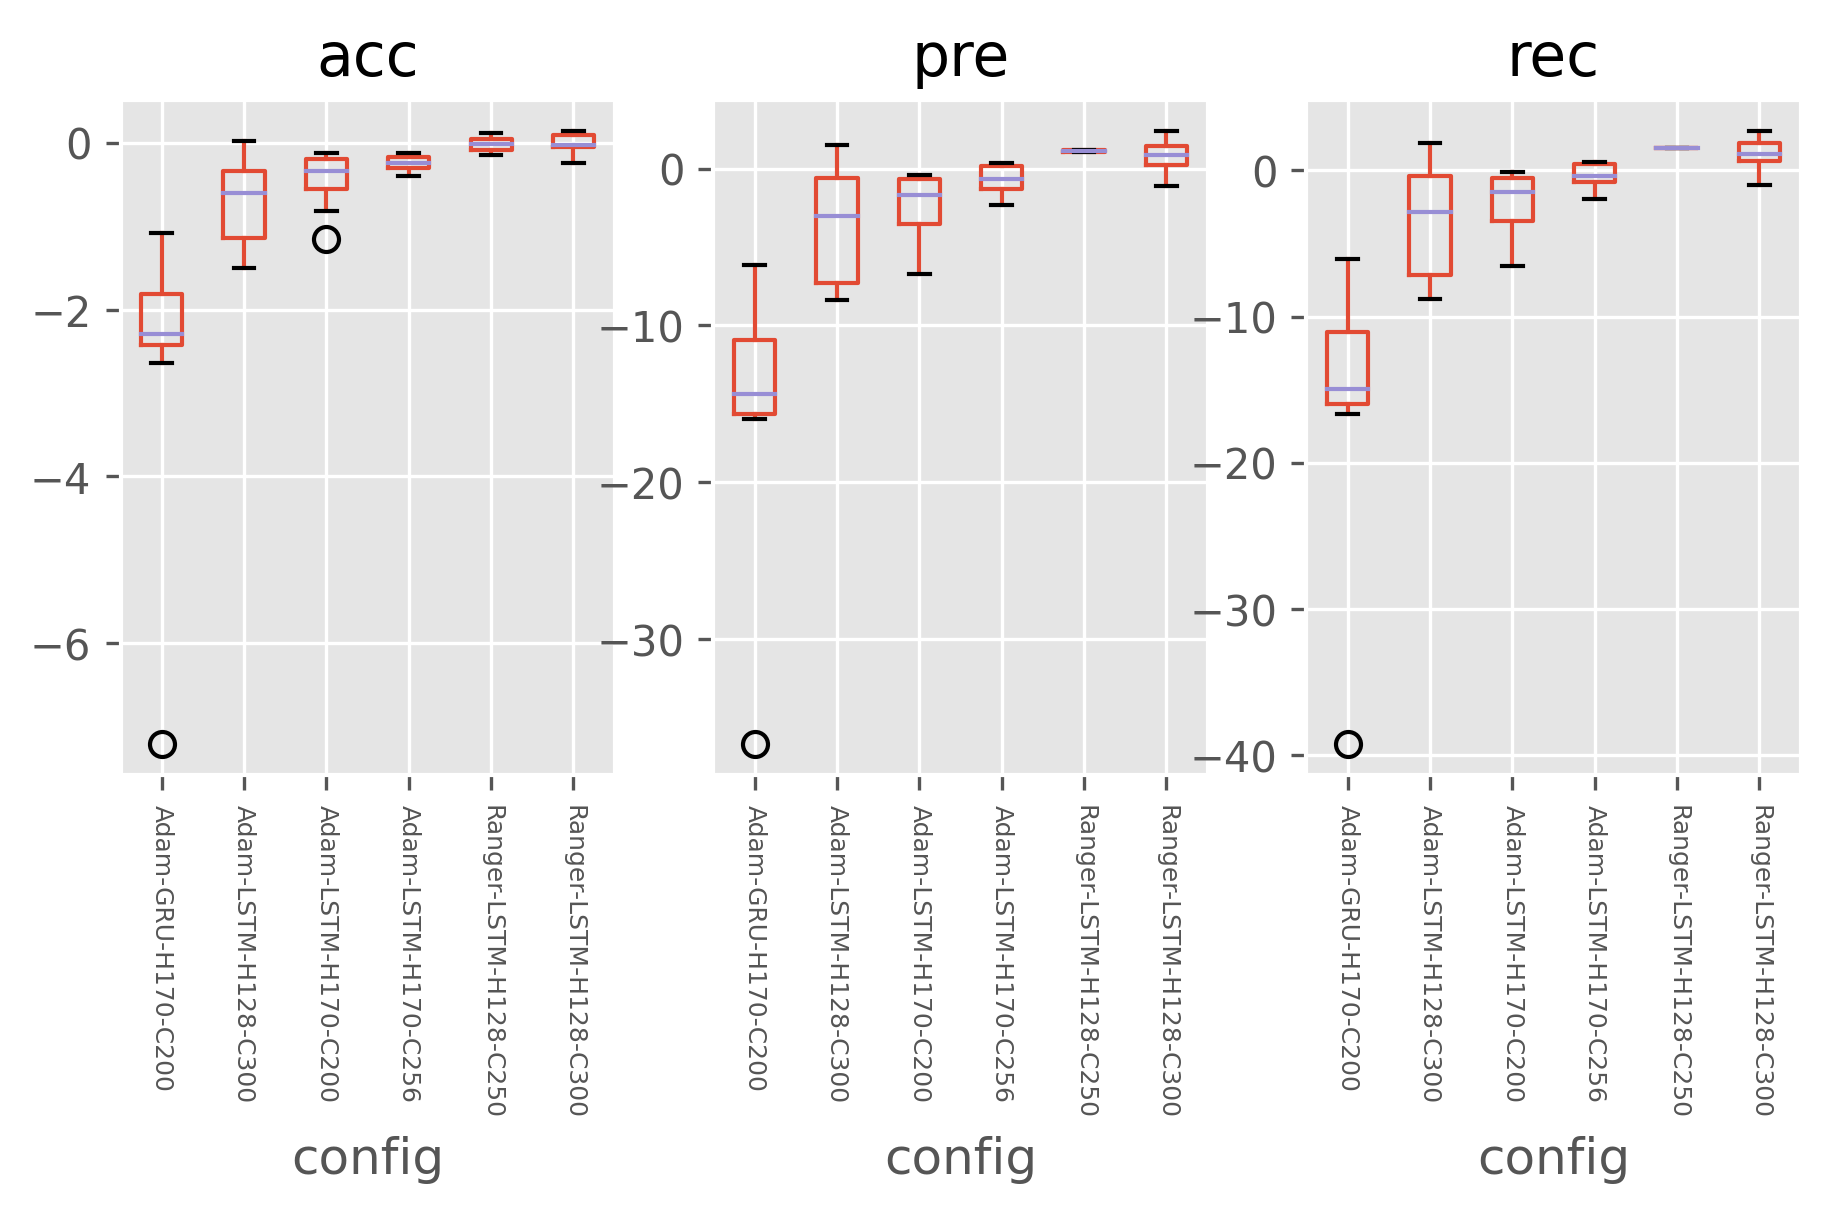

In [27]:
from pandas import DataFrame
import matplotlib.pyplot as plt

def simplify_title(row):
    """Simplify title into a simpler title"""
    # title = row[1]
    # title = title.split("/")[-1].replace(".json", "").replace("1.4.4.a-", "")
    # return [row[0], title] + row[2:]
    return row[1:]
    

models_std = DataFrame(
    [simplify_title(row) for row in comparison_table[1:]], 
    columns=comparison_table[0][1:]
)
models_std.sort_values(by="task")
#models_std.groupby("conf").std()#["acc"].plot()

plt.style.use('ggplot')
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,3), dpi=300)#, sharey=True)
models_std.boxplot(column="acc", by="config", ax=ax1, vert=True, rot=-90)
models_std.boxplot(column="pre", by="config", ax=ax2, vert=True, rot=-90)
models_std.boxplot(column="rec", by="config", ax=ax3, vert=True, rot=-90)
fig.suptitle("")
fig.show()

In [ ]:
from pandas import Series

fig = plt.figure(figsize=(7,2), dpi=300)
ax = fig.gca()
serie = Series((models_std.groupby("task").acc.std()).tolist(), name="Écart-type")
ax = serie.plot.box(ax=ax, vert=False)#*100
ax.set_xlabel("Accuracy (%)")
fig.show()
print(serie.mean(), serie.median())
print(len(models_std.groupby("task")))

# Keeping the best model only

In [ ]:
best = {
}

from collections import namedtuple

Infos = namedtuple("Infos", ["tar", "task", "acc", "pre", "rec", "amb", "score"])
for tar, task, acc, pre, rec, amb, *_, score in comparison_table[1:]:
    if task not in best or best[task].score < score:
        best[task] = Infos(tar, task, acc, pre, rec, amb, score)
    
column = [
    "file", "task", 
    "Accuracy", "Precision", "Recall", "Acc Ambiguous", "Score"
]
table2 = []
for task, values in best.items():
    table2.append(list(values))
    
table2 = sorted(table2, key=lambda x: x[0])  # 2 is acc, 3 amb, 4 tokens
table2 = [column] + table2

In [ ]:
# Create a table like representation
import tabulate
from IPython.display import HTML, display

display(HTML(tabulate.tabulate(table2, tablefmt='html')))

for task_row in table2[1:]:
    print(f"mv ./models/latin-upvc-single-{task_row[1]}-{task_row[0]} bests/{task_row[1]}.tar")

## Comparing Configurations

In [ ]:
reformated = [[row[1]]+row[2:] for row in table2]
print(tabulate.tabulate([d[:-1] for d in reformated[1:]], headers=reformated[0][:-1], tablefmt='github'))